### **DATA PREPARATION**

DATASET EMPLOYEE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/PBL Bitlabs/CID-04_employee.csv')
df.head()

,employe_id,branch_id,salary,join_date,resign_date
0,22,1,8000000,2019-01-21,NaN
1,9900,1,8000000,2019-09-16,NaN
2,173827,1,8000000,2020-06-02,NaN
3,285454,1,8000000,2020-10-14,NaN
4,40,2590,8000000,2019-02-04,NaN


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
print (df.columns)

Index(['employe_id', 'branch_id', 'salary', 'join_date', 'resign_date'], dtype='object')


In [6]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employe_id   177 non-null    int64 
 1   branch_id    177 non-null    int64 
 2   salary       177 non-null    int64 
 3   join_date    177 non-null    object
 4   resign_date  39 non-null     object
dtypes: int64(3), object(2)
memory usage: 7.0+ KB
None


In [7]:
df['join_date'] = pd.to_datetime(df['join_date'])

In [8]:
df['resign_date'] = pd.to_datetime(df['resign_date'])

In [9]:
df.describe()

,employe_id,branch_id,salary,join_date,resign_date
count,177.000000,177.000000,1.770000e+02,177,39
mean,49248.655367,1531.254237,9.844633e+06,2019-05-29 22:38:38.644067840,2020-04-03 22:46:09.230769152
min,1.000000,1.000000,5.000000e+06,2016-08-22 00:00:00,2019-09-10 00:00:00
25%,50.000000,1.000000,7.500000e+06,2018-11-12 00:00:00,2019-11-02 12:00:00
50%,94.000000,2590.000000,1.000000e+07,2019-08-05 00:00:00,2020-02-20 00:00:00
75%,37659.000000,2629.000000,1.250000e+07,2019-11-28 00:00:00,2020-09-24 00:00:00
max,340184.000000,12722.000000,1.450000e+07,2020-12-18 00:00:00,2020-12-20 00:00:00
std,88346.814998,1749.660431,2.830914e+06,NaN,NaN


DATA TIMESHEET

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/content/drive/MyDrive/PBL Bitlabs/CID-04_Timesheets.csv')
df.head()

,timesheet_id,employee_id,date,checkin,checkout
0,43154461,1,2020-04-22,9:16:50,17:27:07
1,25565087,1,2019-10-04,8:42:00,17:48:00
2,45358212,1,2020-05-13,9:00:00,19:53:00
3,42546938,1,2020-04-16,10:13:07,17:41:56
4,30273315,1,2019-12-04,12:00:05,18:02:12


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
print (df.columns)

Index(['timesheet_id', 'employee_id', 'date', 'checkin', 'checkout'], dtype='object')


In [14]:
df.dtypes

,0
timesheet_id,int64
employee_id,int64
date,object
checkin,object
checkout,object


In [15]:
num_rows, num_columns = df.shape

num_rows

39714

In [16]:
df.describe()

,timesheet_id,employee_id
count,3.971400e+04,39714.000000
mean,4.465045e+07,24377.067734
std,1.282190e+07,54302.614246
min,2.390743e+07,1.000000
25%,3.249397e+07,48.000000
50%,4.433762e+07,86.000000
75%,5.603748e+07,19581.000000
max,7.068570e+07,340184.000000


## **DATA CLEANSING**

**DATASET EMPLOYEE**


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/drive/MyDrive/PBL Bitlabs/CID-04_employee.csv')
df.head()

,employe_id,branch_id,salary,join_date,resign_date
0,22,1,8000000,2019-01-21,NaN
1,9900,1,8000000,2019-09-16,NaN
2,173827,1,8000000,2020-06-02,NaN
3,285454,1,8000000,2020-10-14,NaN
4,40,2590,8000000,2019-02-04,NaN


*Duplikat data*

In [19]:
df.duplicated().sum()

np.int64(0)

*Inconsisten data*

In [20]:
# Memeriksa kolom numerik
kolom_numerik = df.select_dtypes(include=['number']).columns
kolom_numerik

Index(['employe_id', 'branch_id', 'salary'], dtype='object')

In [21]:
# Mengecek nilai negatif pada kolom 'salary'
inconsistent_data = df[df['salary'] < 0]

# Print baris yang memiliki nilai negatif
if len(inconsistent_data) > 0:
    print("Terdapat baris dengan nilai negatif pada kolom 'salary':")
    for index, row in inconsistent_data.iterrows():
        print(f"Baris {index + 1}: {row.to_dict()}")
else:
    print("Tidak ditemukan nilai negatif pada kolom 'salary'.")

Tidak ditemukan nilai negatif pada kolom 'salary'.


*Outlier*

In [22]:
numerical_df = df.select_dtypes(include=['number'])

Text(0.5, 1.0, 'Box plot of salary')

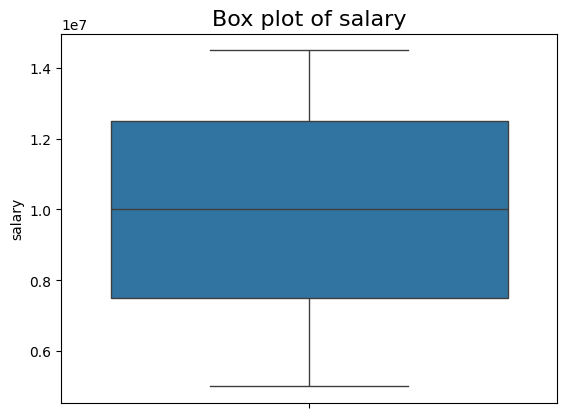

In [23]:
sns.boxplot(y=df['salary']).set_title('Box plot of salary', size=16)

Text(0.5, 1.0, 'Box plot of employe id')

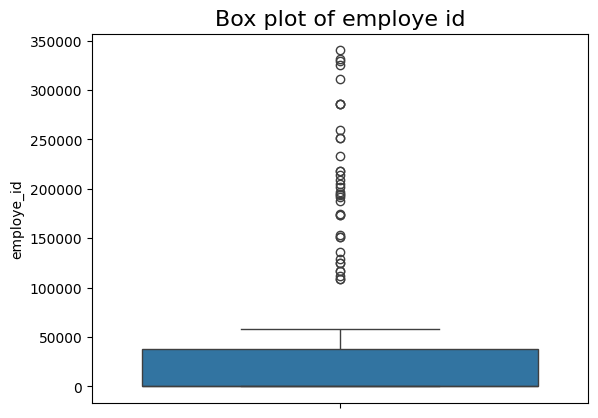

In [24]:
sns.boxplot(y=df['employe_id']).set_title('Box plot of employe id', size=16)

Text(0.5, 1.0, 'Box plot of branch id')

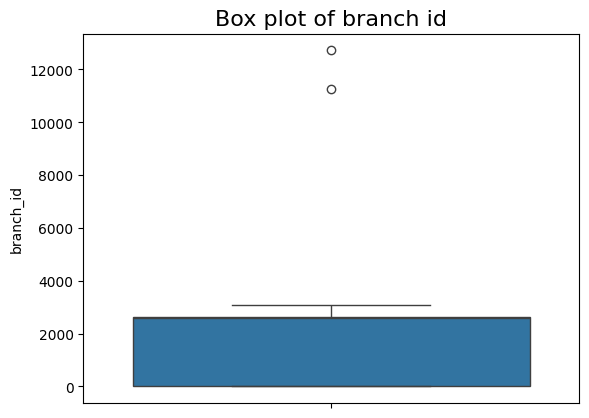

In [25]:
sns.boxplot(y=df['branch_id']).set_title('Box plot of branch id', size=16)

*Missing value*

In [26]:
total = df.isnull().sum().sort_values(ascending=False)
print(total)

resign_date    138
employe_id       0
branch_id        0
salary           0
join_date        0
dtype: int64


**DATA TIMESHEET**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('/content/drive/MyDrive/PBL Bitlabs/CID-04_Timesheets.csv')
df.head()

,timesheet_id,employee_id,date,checkin,checkout
0,43154461,1,2020-04-22,9:16:50,17:27:07
1,25565087,1,2019-10-04,8:42:00,17:48:00
2,45358212,1,2020-05-13,9:00:00,19:53:00
3,42546938,1,2020-04-16,10:13:07,17:41:56
4,30273315,1,2019-12-04,12:00:05,18:02:12


*Duplikat data*

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df[df.duplicated()]

,timesheet_id,employee_id,date,checkin,checkout


*Outlier*

Text(0.5, 1.0, 'Box plot of timesheet id')

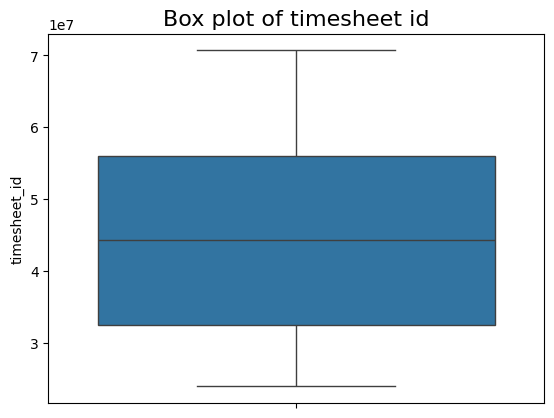

In [31]:
sns.boxplot(y=df['timesheet_id']).set_title('Box plot of timesheet id', size=16)

Text(0.5, 1.0, 'Box plot of employe id')

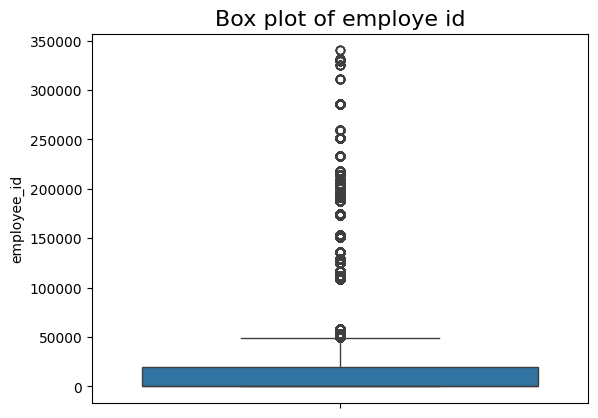

In [32]:
sns.boxplot(y=df['employee_id']).set_title('Box plot of employe id', size=16)

*Missing value*

In [33]:
total = df.isnull().sum().sort_values(ascending=False)
print(total)

timesheet_id    0
employee_id     0
date            0
checkin         0
checkout        0
dtype: int64
